In [9]:
import pandas as pd
from pycaret.classification import *
df = pd.read_csv("Data/Pulp Sensibility Data.csv")
df.head()


,Patient_Gender,Patient_Age,Pulp_Stone_or_Calcification,Pain_Duration_Days,Percussion_Test,Palpation,EPT_duration_before_anaesthesia_seconds,Dental_History,Curved_Canal,Cold_Test_Pain_Duration_before_anaesthesia_seconds,...,Clinical_Pain_VAS_Score,Mobility,Medical_History,EPT_current_pass,EPT_VAS_before_anaesthesia,PDL_Space,PDL_Ligament_involvement,Lamina_Dura,local_Anesthetic,Need_Suppliment
0,F,37,No,30,Positive,Negative,5,No,Yes,0,...,6,No,No,32,5,Yes,Yes,Loss,Maxilla,Yes
1,F,47,No,30,Negative,Negative,3,No,No,3,...,2,No,No,80,0,No,No,Intact,Maxilla,Yes
2,F,27,No,7,Negative,Negative,19,No,No,23,...,6,No,No,27,5,No,No,Intact,Mandible,Yes
3,M,27,No,7,Negative,Negative,37,No,No,27,...,6,No,No,21,5,No,No,Intact,Mandible,Yes
4,M,23,No,60,Positive,Negative,5,No,Yes,12,...,4,No,No,43,2,Yes,No,Intact,Mandible,Yes


In [10]:
len(df.columns)

21

In [11]:
s = setup(data = df, target = 'Need_Suppliment', session_id=123)
best_model = compare_models(sort="F1")

,Description,Value
0,Session id,123
1,Target,Need_Suppliment
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(127, 21)"
5,Transformed data shape,"(127, 21)"
6,Transformed train set shape,"(88, 21)"
7,Transformed test set shape,"(39, 21)"
8,Ordinal features,12
9,Numeric features,8


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7736,0.8322,0.8467,0.8314,0.8249,0.4827,0.5121,1.3910
ridge,Ridge Classifier,0.7514,0.0000,0.8667,0.7955,0.8169,0.4046,0.4254,0.4700
lda,Linear Discriminant Analysis,0.7389,0.7956,0.8300,0.8065,0.8049,0.3868,0.3981,0.4730
rf,Random Forest Classifier,0.7361,0.8072,0.8433,0.7786,0.8018,0.3923,0.4138,0.5210
svm,SVM - Linear Kernel,0.7042,0.0000,0.8933,0.7455,0.7967,0.2346,0.2611,0.4460
dummy,Dummy Classifier,0.6583,0.5000,1.0000,0.6583,0.7938,0.0000,0.0000,0.4680
qda,Quadratic Discriminant Analysis,0.6681,0.6633,0.9300,0.6833,0.7860,0.1133,0.1335,0.4720
catboost,CatBoost Classifier,0.7139,0.7944,0.8267,0.7619,0.7851,0.3423,0.3638,0.6180
knn,K Neighbors Classifier,0.7139,0.7867,0.8100,0.7829,0.7820,0.3422,0.3717,0.5050
dt,Decision Tree Classifier,0.7153,0.6922,0.7800,0.8013,0.7780,0.3692,0.3882,0.4720


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [12]:
best_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8889,0.9444,1.0000,0.8571,0.9231,0.7273,0.7559
1,0.6667,1.0000,1.0000,0.6667,0.8000,0.0000,0.0000
2,0.8889,1.0000,1.0000,0.8571,0.9231,0.7273,0.7559
3,0.7778,1.0000,0.6667,1.0000,0.8000,0.5714,0.6325
4,0.8889,0.8333,0.8333,1.0000,0.9091,0.7692,0.7906
5,0.6667,0.6667,0.6667,0.8000,0.7273,0.3077,0.3162
6,0.7778,0.8889,1.0000,0.7500,0.8571,0.4000,0.5000
7,0.5556,0.3889,0.5000,0.7500,0.6000,0.1429,0.1581
8,0.7500,0.6667,0.8000,0.8000,0.8000,0.4667,0.4667


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [14]:
tuned_lr = tune_model(lr)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [15]:
predict_model(lr)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7179,0.7929,0,0,0,0.4000,0.4055


,Patient_Gender,Patient_Age,Pulp_Stone_or_Calcification,Pain_Duration_Days,Percussion_Test,Palpation,EPT_duration_before_anaesthesia_seconds,Dental_History,Curved_Canal,Cold_Test_Pain_Duration_before_anaesthesia_seconds,...,Medical_History,EPT_current_pass,EPT_VAS_before_anaesthesia,PDL_Space,PDL_Ligament_involvement,Lamina_Dura,local_Anesthetic,Need_Suppliment,prediction_label,prediction_score
50,M,41,No,25,Positive,Negative,15,No,No,17,...,No,40,5,No,No,Intact,Maxilla,Yes,Yes,0.5923
1,F,47,No,30,Negative,Negative,3,No,No,3,...,No,80,0,No,No,Intact,Maxilla,Yes,Yes,0.5675
84,M,30,No,7,Positive,Negative,12,No,Yes,21,...,No,31,5,Yes,Yes,Loss,Maxilla,No,No,0.7191
6,F,29,No,10,Positive,Negative,12,No,Yes,23,...,No,40,5,No,No,Intact,Maxilla,Yes,Yes,0.6858
112,M,23,No,2,Negative,Negative,3,No,No,7,...,No,13,7,No,No,Intact,Mandible,No,No,0.8080
26,M,21,No,4,Negative,Negative,2,Yes,No,10,...,No,27,10,No,No,Intact,Mandible,Yes,No,0.8169
20,M,32,No,1,Negative,Negative,7,Yes,Yes,12,...,No,40,6,No,No,Intact,Mandible,Yes,Yes,0.9588
86,M,27,No,2,Positive,Negative,13,No,Yes,17,...,No,16,5,No,No,Intact,Mandible,No,Yes,0.5757
25,M,20,No,30,Negative,Negative,3,No,No,10,...,No,40,3,No,No,Intact,Maxilla,Yes,No,0.7121
75,F,58,Yes,60,Positive,Positive,15,Yes,Yes,22,...,No,43,5,Yes,Yes,Loss,Mandible,Yes,Yes,0.9988


In [16]:
final_et = finalize_model(tuned_lr)

In [17]:
predict_model(final_et)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7692,0.8905,0,0,0,0.4906,0.4914


,Patient_Gender,Patient_Age,Pulp_Stone_or_Calcification,Pain_Duration_Days,Percussion_Test,Palpation,EPT_duration_before_anaesthesia_seconds,Dental_History,Curved_Canal,Cold_Test_Pain_Duration_before_anaesthesia_seconds,...,Medical_History,EPT_current_pass,EPT_VAS_before_anaesthesia,PDL_Space,PDL_Ligament_involvement,Lamina_Dura,local_Anesthetic,Need_Suppliment,prediction_label,prediction_score
50,M,41,No,25,Positive,Negative,15,No,No,17,...,No,40,5,No,No,Intact,Maxilla,Yes,Yes,0.7706
1,F,47,No,30,Negative,Negative,3,No,No,3,...,No,80,0,No,No,Intact,Maxilla,Yes,Yes,0.6733
84,M,30,No,7,Positive,Negative,12,No,Yes,21,...,No,31,5,Yes,Yes,Loss,Maxilla,No,No,0.7127
6,F,29,No,10,Positive,Negative,12,No,Yes,23,...,No,40,5,No,No,Intact,Maxilla,Yes,Yes,0.7719
112,M,23,No,2,Negative,Negative,3,No,No,7,...,No,13,7,No,No,Intact,Mandible,No,No,0.7370
26,M,21,No,4,Negative,Negative,2,Yes,No,10,...,No,27,10,No,No,Intact,Mandible,Yes,No,0.6395
20,M,32,No,1,Negative,Negative,7,Yes,Yes,12,...,No,40,6,No,No,Intact,Mandible,Yes,Yes,0.9343
86,M,27,No,2,Positive,Negative,13,No,Yes,17,...,No,16,5,No,No,Intact,Mandible,No,Yes,0.5571
25,M,20,No,30,Negative,Negative,3,No,No,10,...,No,40,3,No,No,Intact,Maxilla,Yes,No,0.5483
75,F,58,Yes,60,Positive,Positive,15,Yes,Yes,22,...,No,43,5,Yes,Yes,Loss,Mandible,Yes,Yes,0.9963


In [18]:
data_unseen = pd.read_csv("Data/test.csv")
data_unseen

,Patient_Gender,Patient_Age,Pulp_Stone_or_Calcification,Pain_Duration_Days,Percussion_Test,Palpation,EPT_duration_before_anaesthesia_seconds,Dental_History,Curved_Canal,Cold_Test_Pain_Duration_before_anaesthesia_seconds,Cold_test_VAS_Score_Before_anaesthesia,Clinical_Pain_VAS_Score,Mobility,Medical_History,EPT_current_pass,EPT_VAS_before_anaesthesia,PDL_Space,PDL_Ligament_involvement,Lamina_Dura,local_Anesthetic
0,F,37,No,30,Positive,Negative,5,No,Yes,0,0,6,No,No,32,5,Yes,Yes,Loss,Maxilla
1,F,47,No,30,Negative,Negative,3,No,No,3,3,2,No,No,80,0,No,No,Intact,Maxilla
2,F,27,No,7,Negative,Negative,19,No,No,23,7,6,No,No,27,5,No,No,Intact,Mandible
3,M,27,No,7,Negative,Negative,37,No,No,27,7,6,No,No,21,5,No,No,Intact,Mandible
4,M,23,No,60,Positive,Negative,5,No,Yes,12,5,4,No,No,43,2,Yes,No,Intact,Mandible
5,F,34,Yes,2,Negative,Negative,27,No,Yes,13,7,9,No,No,47,5,No,No,Intact,Maxilla
6,F,29,No,10,Positive,Negative,12,No,Yes,23,8,7,No,No,40,5,No,No,Intact,Maxilla
7,F,33,Yes,7,Negative,Negative,13,No,No,23,8,7,No,No,47,5,No,No,Intact,Maxilla
8,F,40,No,2,Negative,Negative,3,No,No,7,5,5,No,No,14,3,No,No,Intact,Maxilla
9,M,22,No,30,Positive,Negative,1,No,Yes,7,7,6,No,No,10,5,Yes,Yes,Intact,Mandible


In [19]:
new_prediction = predict_model(final_et, data=data_unseen)
new_prediction

,Patient_Gender,Patient_Age,Pulp_Stone_or_Calcification,Pain_Duration_Days,Percussion_Test,Palpation,EPT_duration_before_anaesthesia_seconds,Dental_History,Curved_Canal,Cold_Test_Pain_Duration_before_anaesthesia_seconds,...,Mobility,Medical_History,EPT_current_pass,EPT_VAS_before_anaesthesia,PDL_Space,PDL_Ligament_involvement,Lamina_Dura,local_Anesthetic,prediction_label,prediction_score
0,F,37,No,30,Positive,Negative,5,No,Yes,0,...,No,No,32,5,Yes,Yes,Loss,Maxilla,No,0.7954
1,F,47,No,30,Negative,Negative,3,No,No,3,...,No,No,80,0,No,No,Intact,Maxilla,Yes,0.6733
2,F,27,No,7,Negative,Negative,19,No,No,23,...,No,No,27,5,No,No,Intact,Mandible,Yes,0.5358
3,M,27,No,7,Negative,Negative,37,No,No,27,...,No,No,21,5,No,No,Intact,Mandible,Yes,0.8014
4,M,23,No,60,Positive,Negative,5,No,Yes,12,...,No,No,43,2,Yes,No,Intact,Mandible,Yes,0.7893
5,F,34,Yes,2,Negative,Negative,27,No,Yes,13,...,No,No,47,5,No,No,Intact,Maxilla,Yes,0.9908
6,F,29,No,10,Positive,Negative,12,No,Yes,23,...,No,No,40,5,No,No,Intact,Maxilla,Yes,0.7719
7,F,33,Yes,7,Negative,Negative,13,No,No,23,...,No,No,47,5,No,No,Intact,Maxilla,Yes,0.8978
8,F,40,No,2,Negative,Negative,3,No,No,7,...,No,No,14,3,No,No,Intact,Maxilla,No,0.8405
9,M,22,No,30,Positive,Negative,1,No,Yes,7,...,No,No,10,5,Yes,Yes,Intact,Mandible,No,0.7004


In [20]:
save_model(final_et,'Final_ET_Model_12June2023' )

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\user\AppData\Local\Temp\joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Patient_Age',
                                              'Pain_Duration_Days',
                                              'EPT_duration_before_anaesthesia_seconds',
                                              'Cold_Test_Pain_Duration...
                                                                          'data_type': dtype('O'),
                                                                          'mapping': Mandible    0
 Maxilla     1
 NaN        -1
 dtype: int64}],
                                                                return_df=True,
                        

In [21]:
dashboard(final_et)

Note: shap values for shap='kernel' normally get calculated against X_background, but paramater X_background=None, so setting X_background=shap.sample(X, 50)...
Generating self.shap_explainer = shap.KernelExplainer(model, X, link='identity')
Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...


  0%|          | 0/39 [00:00<?, ?it/s]

Calculating prediction probabilities...
Calculating metrics...
Calculating confusion matrices...
Calculating classification_dfs...
Calculating roc auc curves...
Calculating pr auc curves...
Calculating liftcurve_dfs...
Calculating dependencies...
Calculating permutation importances (if slow, try setting n_jobs parameter)...
Calculating pred_percentiles...
Calculating predictions...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard on http://192.168.68.109:8050
Dash is running on http://0.0.0.0:8050/

 * Serving Flask app 'explainerdashboard.dashboards'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:8050
 * Running on http://192.168.68.109:8050
Press CTRL+C to quit
192.168.68.109 - - [17/Jun/2023 15:43:24] "GET / HTTP/1.1" 200 -
192.168.68.109 - - [17/Jun/2023 15:43:24] "GET /assets/bootstrap.min.css?m=1683257917.4690094 HTTP/1.1" 200 -
192.168.68.109 - - [17/Jun/2023 15:43:24] "GET /_dash-component-suites/dash/deps/polyfill@7.v2_9_3m1683087230.12.1.min.js HTTP/1.1" 200 -
192.168.68.109 - - [17/Jun/2023 15:43:24] "GET /_dash-component-suites/dash/deps/react@16.v2_9_3m1683087230.14.0.min.js HTTP/1.1" 200 -
192.168.68.109 - - [17/Jun/2023 15:43:24] "GET /_dash-component-suites/dash/deps/react-dom@16.v2_9_3m1683087230.14.0.min.js HTTP/1.1" 200 -
192.168.68.109 - - [17/Jun/2023 15:43:24] "GET /_dash-component-suites/dash/deps/prop-types@15.v2_9_3m1683087230.8.1.min.js HTTP/1.1" 200 -
192.168.68.109 - - [17/Jun/2023 15:43:24] "GET /_dash-component-suites/dash_bootstrap_components/_components/dash_bootstrap_components.

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7692,0.8905,0,0,0,0.4906,0.4914


Found 52 subgroups. Evaluation may be slow


Samples Accuracy Recall Precision        F1 Kappa  \
Patient_Gender Patient_Age                                                     
F              16                2      0.5    0.0       0.0       0.0   0.0   
               20              NaN      NaN    NaN       NaN       NaN   NaN   
               21              NaN      NaN    NaN       NaN       NaN   NaN   
               23                2      0.5    0.0       0.0       0.0   0.0   
               24              NaN      NaN    NaN       NaN       NaN   NaN   
               26              NaN      NaN    NaN       NaN       NaN   NaN   
               27                1      0.0    0.0       0.0       0.0   0.0   
               29                1      1.0    1.0       1.0       1.0   NaN   
               30              NaN      NaN    NaN       NaN       NaN   NaN   
               31              NaN      NaN    NaN       NaN       NaN   NaN   
               32                1      1.0    0.0       0.0       0.0   NaN   
               33                1      0.0    0.0       0.0       0.0   0.0   
               35                1      1.0    1.0       1.0       1.0   NaN   
               36                1      1.0    1.0       1.0       1.0   NaN   
               38              NaN      NaN    NaN       NaN       NaN   NaN   
               39                1      0.0    0.0       0.0       0.0   0.0   
               40                1      1.0    0.0       0.0       0.0   NaN   
               41              NaN      NaN    NaN       NaN       NaN   NaN   
               42                1      1.0    1.0       1.0       1.0   NaN   
               46              NaN      NaN    NaN       NaN       NaN   NaN   
               47                2      1.0    1.0       1.0       1.0   NaN   
               52              NaN      NaN    NaN       NaN       NaN   NaN   
               54                1      1.0    1.0       1.0       1.0   NaN   
               55              NaN      NaN    NaN       NaN       NaN   NaN   
               57              NaN      NaN    NaN       NaN       NaN   NaN   
               58                1      1.0    1.0       1.0       1.0   NaN   
M              16                1      1.0    1.0       1.0       1.0   NaN   
               20                1      0.0    0.0       0.0       0.0   0.0   
               21                1      0.0    0.0       0.0       0.0   0.0   
               23                1      1.0    0.0       0.0       0.0   NaN   
               24                1      1.0    0.0       0.0       0.0   NaN   
               26                1      0.0    0.0       0.0       0.0   0.0   
               27                4     0.75    1.0      0.75  0.857143   0.0   
               29              NaN      NaN    NaN       NaN       NaN   NaN   
               30                1      1.0    0.0       0.0       0.0   NaN   
               31                1      1.0    1.0       1.0       1.0   NaN   
               32                3      1.0    1.0       1.0       1.0   1.0   
               33              NaN      NaN    NaN       NaN       NaN   NaN   
               35              NaN      NaN    NaN       NaN       NaN   NaN   
               36              NaN      NaN    NaN       NaN       NaN   NaN   
               38                1      1.0    0.0       0.0       0.0   NaN   
               39              NaN      NaN    NaN       NaN       NaN   NaN   
               40              NaN      NaN    NaN       NaN       NaN   NaN   
               41                1      1.0    1.0       1.0       1.0   NaN   
               42              NaN      NaN    NaN       NaN       NaN   NaN   
               46                1      1.0    1.0       1.0       1.0   NaN   
               47              NaN      NaN    NaN       NaN       NaN   NaN   
               52                1      1.0    1.0       1.0       1.0   NaN   
               54          

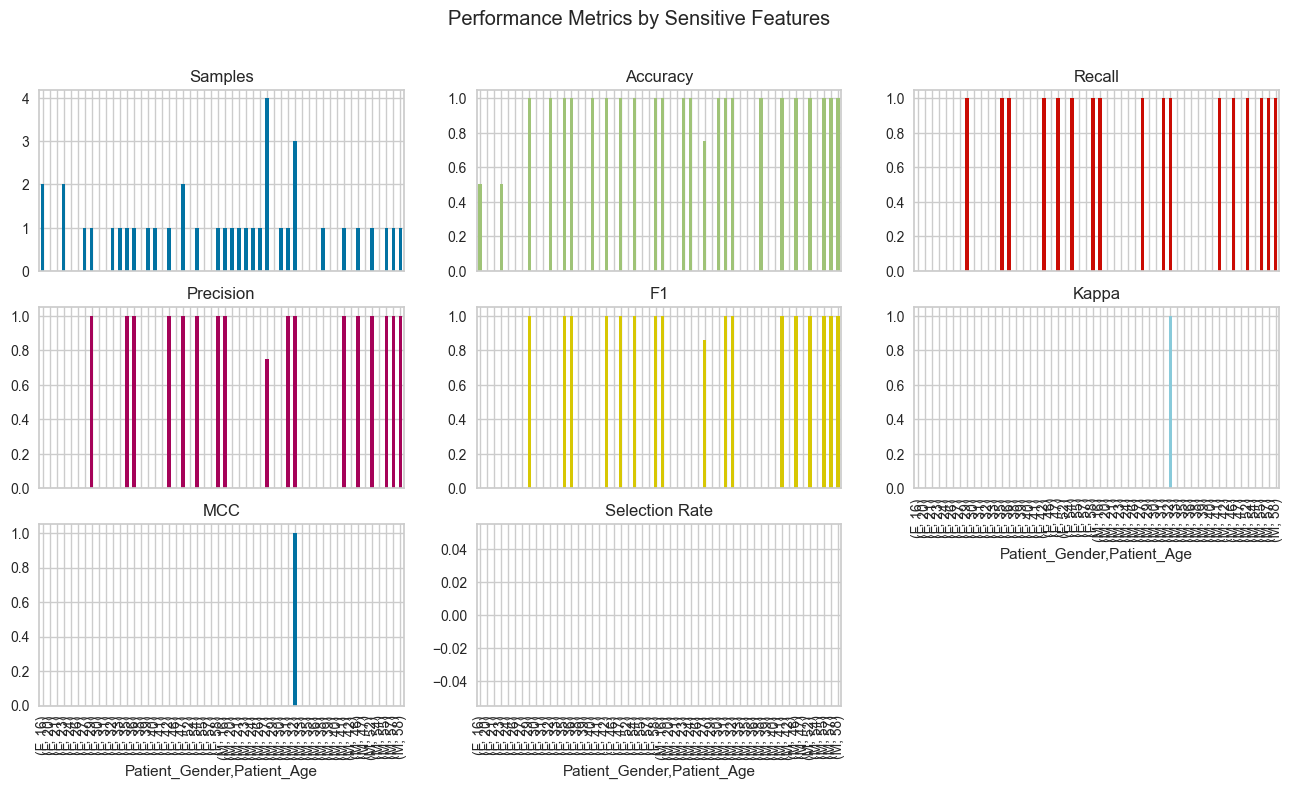

In [25]:
check_fairness(final_et, sensitive_features = ['Patient_Gender', 'Patient_Age'])

,Description,Value
0,Session id,559
1,Target,Need_Suppliment
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(127, 21)"
5,Transformed data shape,"(127, 21)"
6,Transformed train set shape,"(88, 21)"
7,Transformed test set shape,"(39, 21)"
8,Ordinal features,12
9,Numeric features,8


Shape of your Data Set loaded: (127, 21)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


,Nullpercent,NuniquePercent,dtype,Nuniques,Nulls,Least num. of categories,Data cleaning improvement suggestions
Patient_Gender,0.000000,1.574803,float64,2,0,0,
Patient_Age,0.000000,31.496063,float64,40,0,0,
Lamina_Dura,0.000000,1.574803,float64,2,0,0,
PDL_Ligament_involvement,0.000000,1.574803,float64,2,0,0,
PDL_Space,0.000000,1.574803,float64,2,0,0,
EPT_VAS_before_anaesthesia,0.000000,7.086614,float64,9,0,0,
EPT_current_pass,0.000000,32.283465,float64,41,0,0,
Medical_History,0.000000,1.574803,float64,2,0,0,
Mobility,0.000000,1.574803,float64,2,0,0,right skewed distribution: cap or drop outliers
Clinical_Pain_VAS_Score,0.000000,7.874016,float64,10,0,0,


    20 Predictors classified...
        No variables removed since no ID or low-information variables found in data set

################ Binary_Classification problem #####################


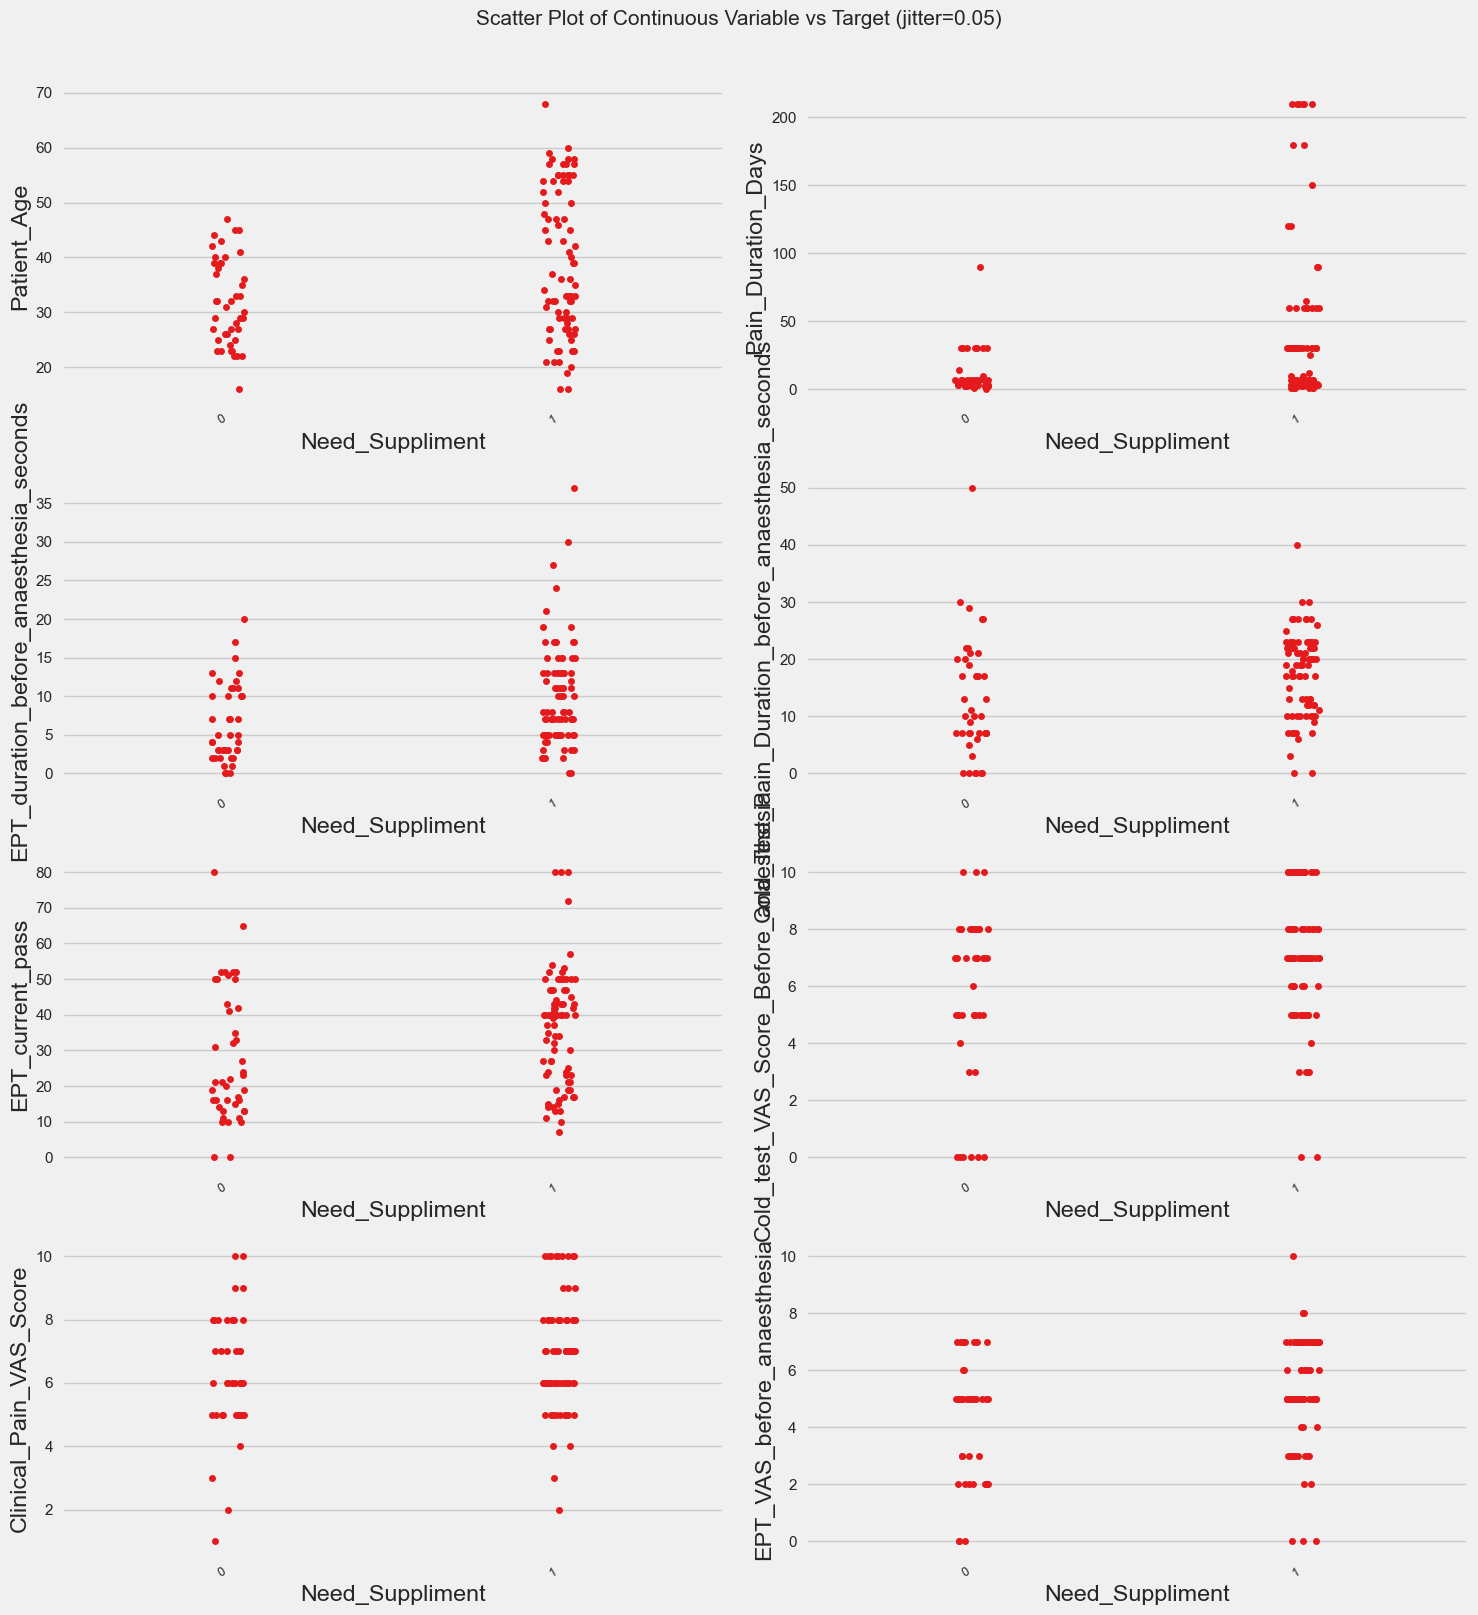

Total Number of Scatter Plots = 36


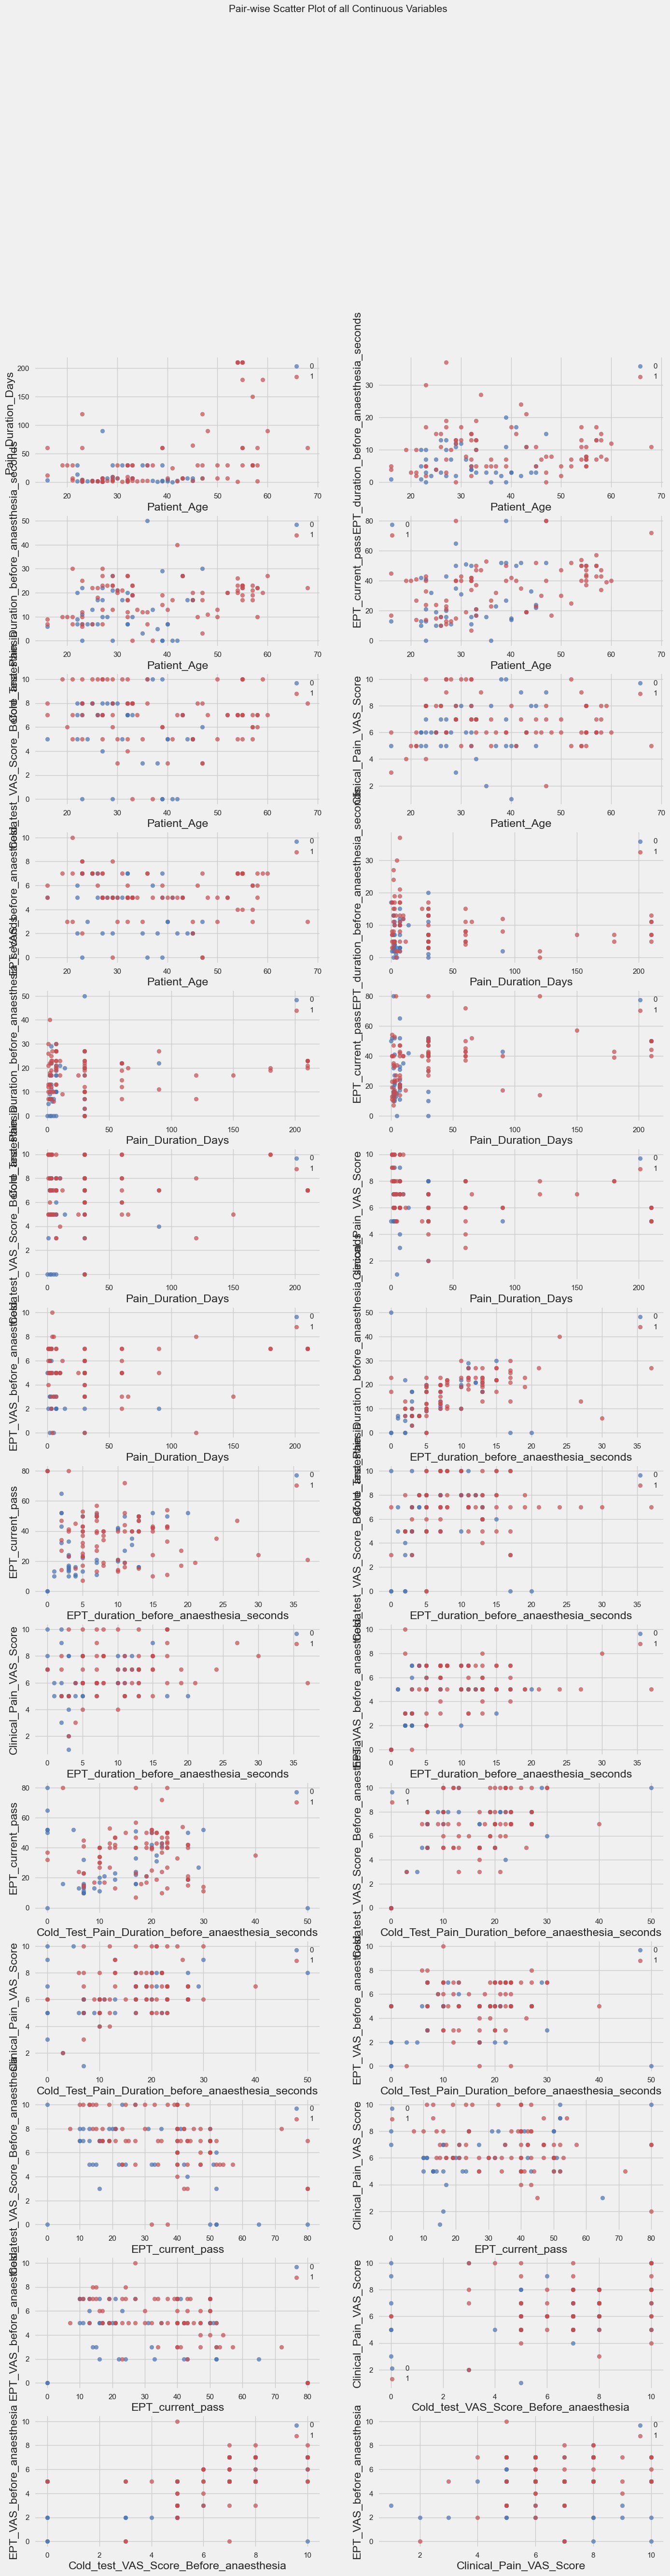

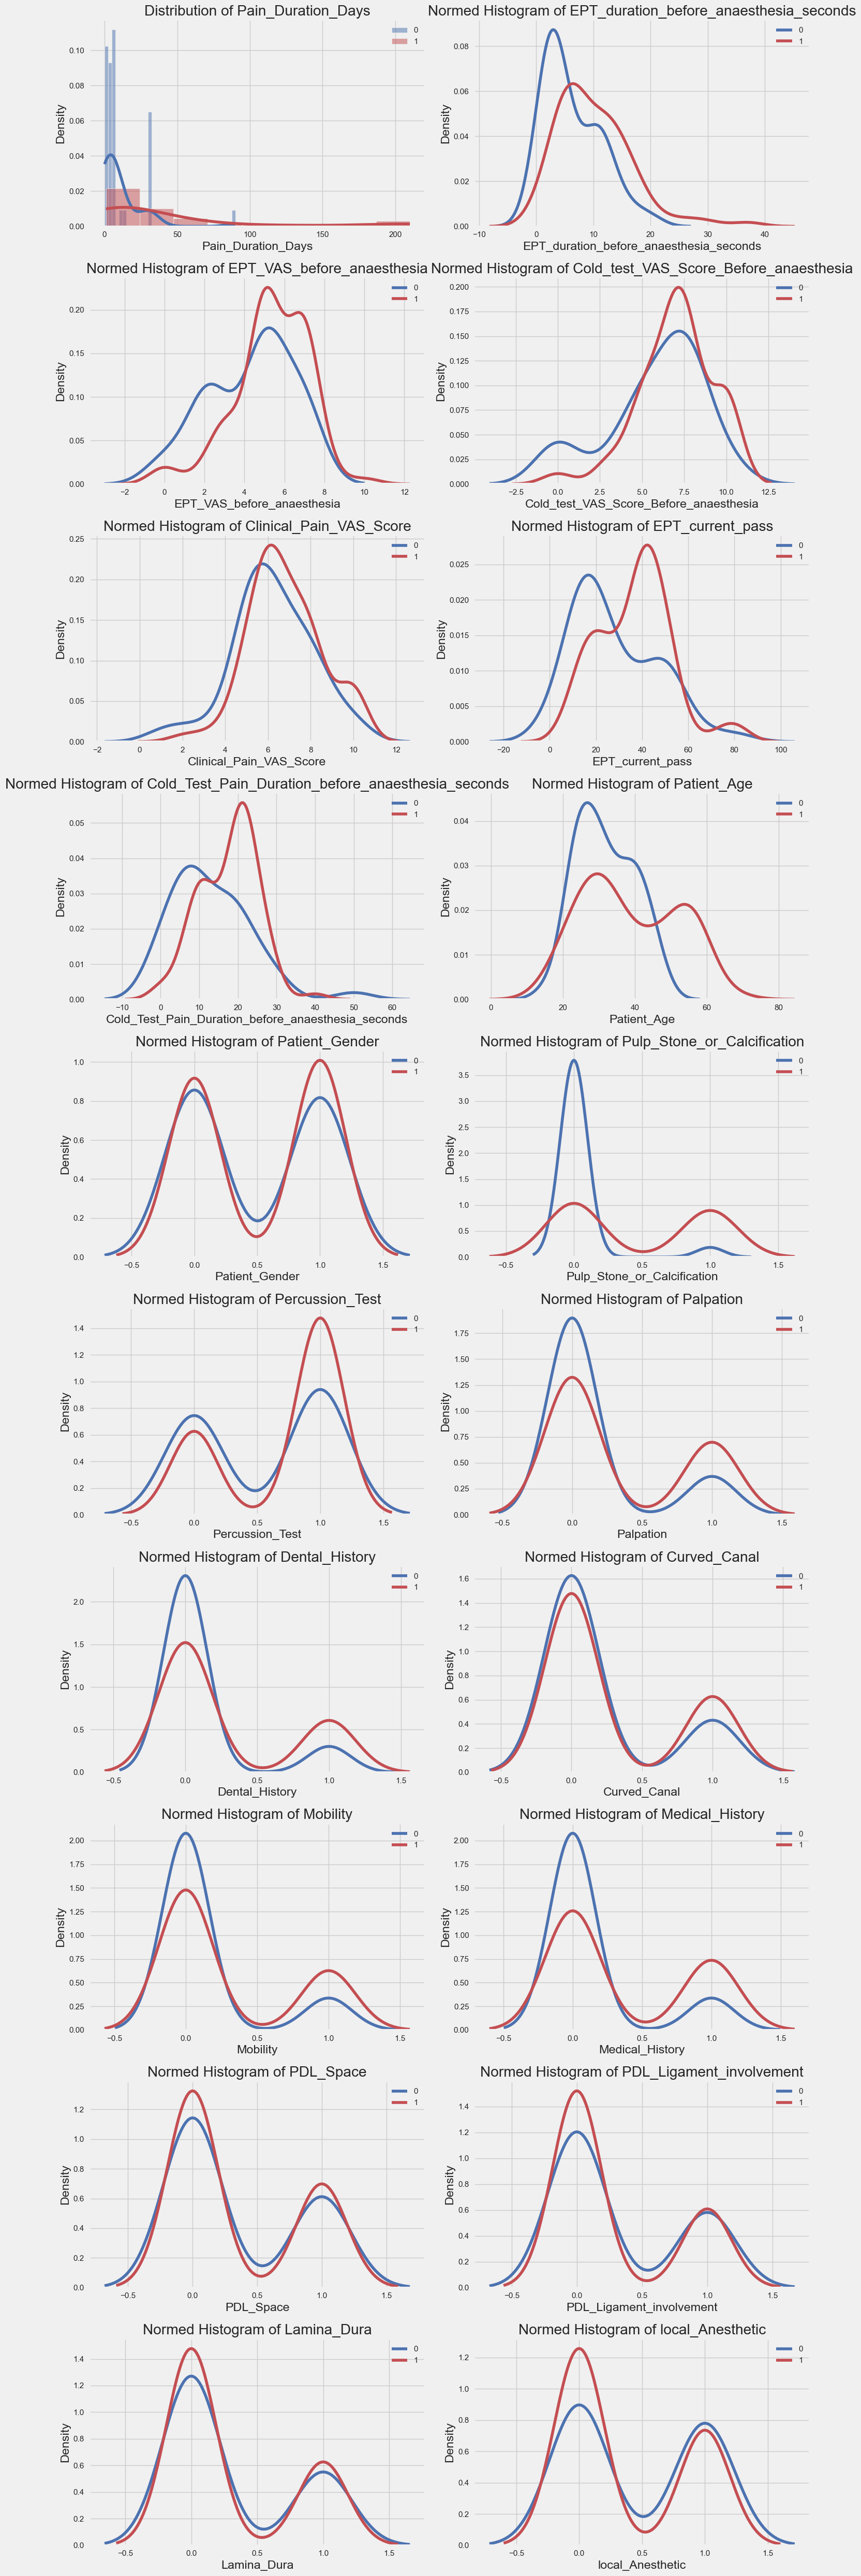

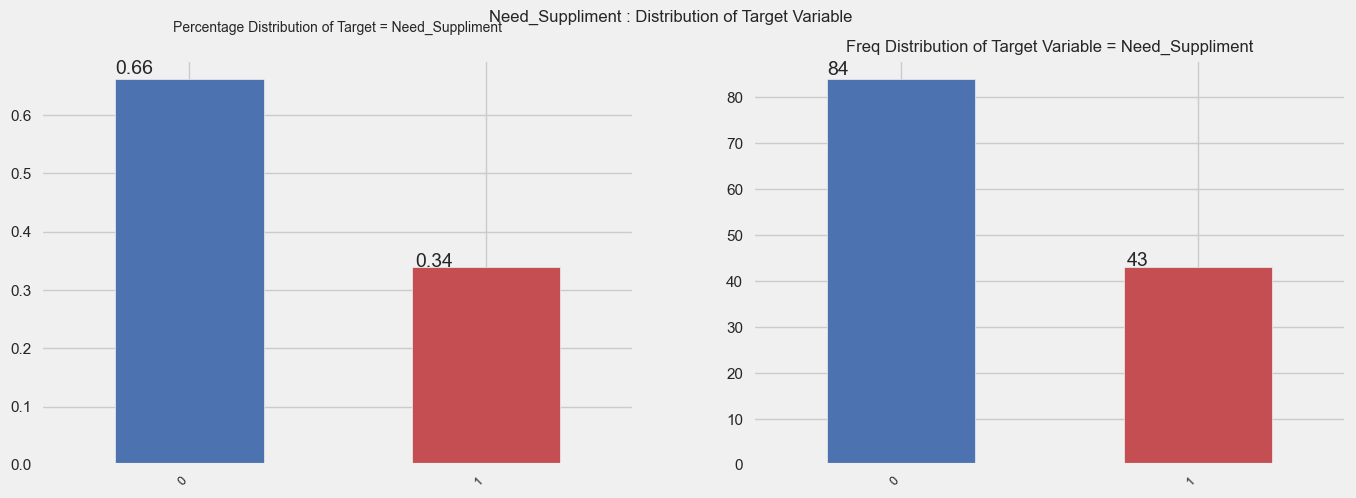

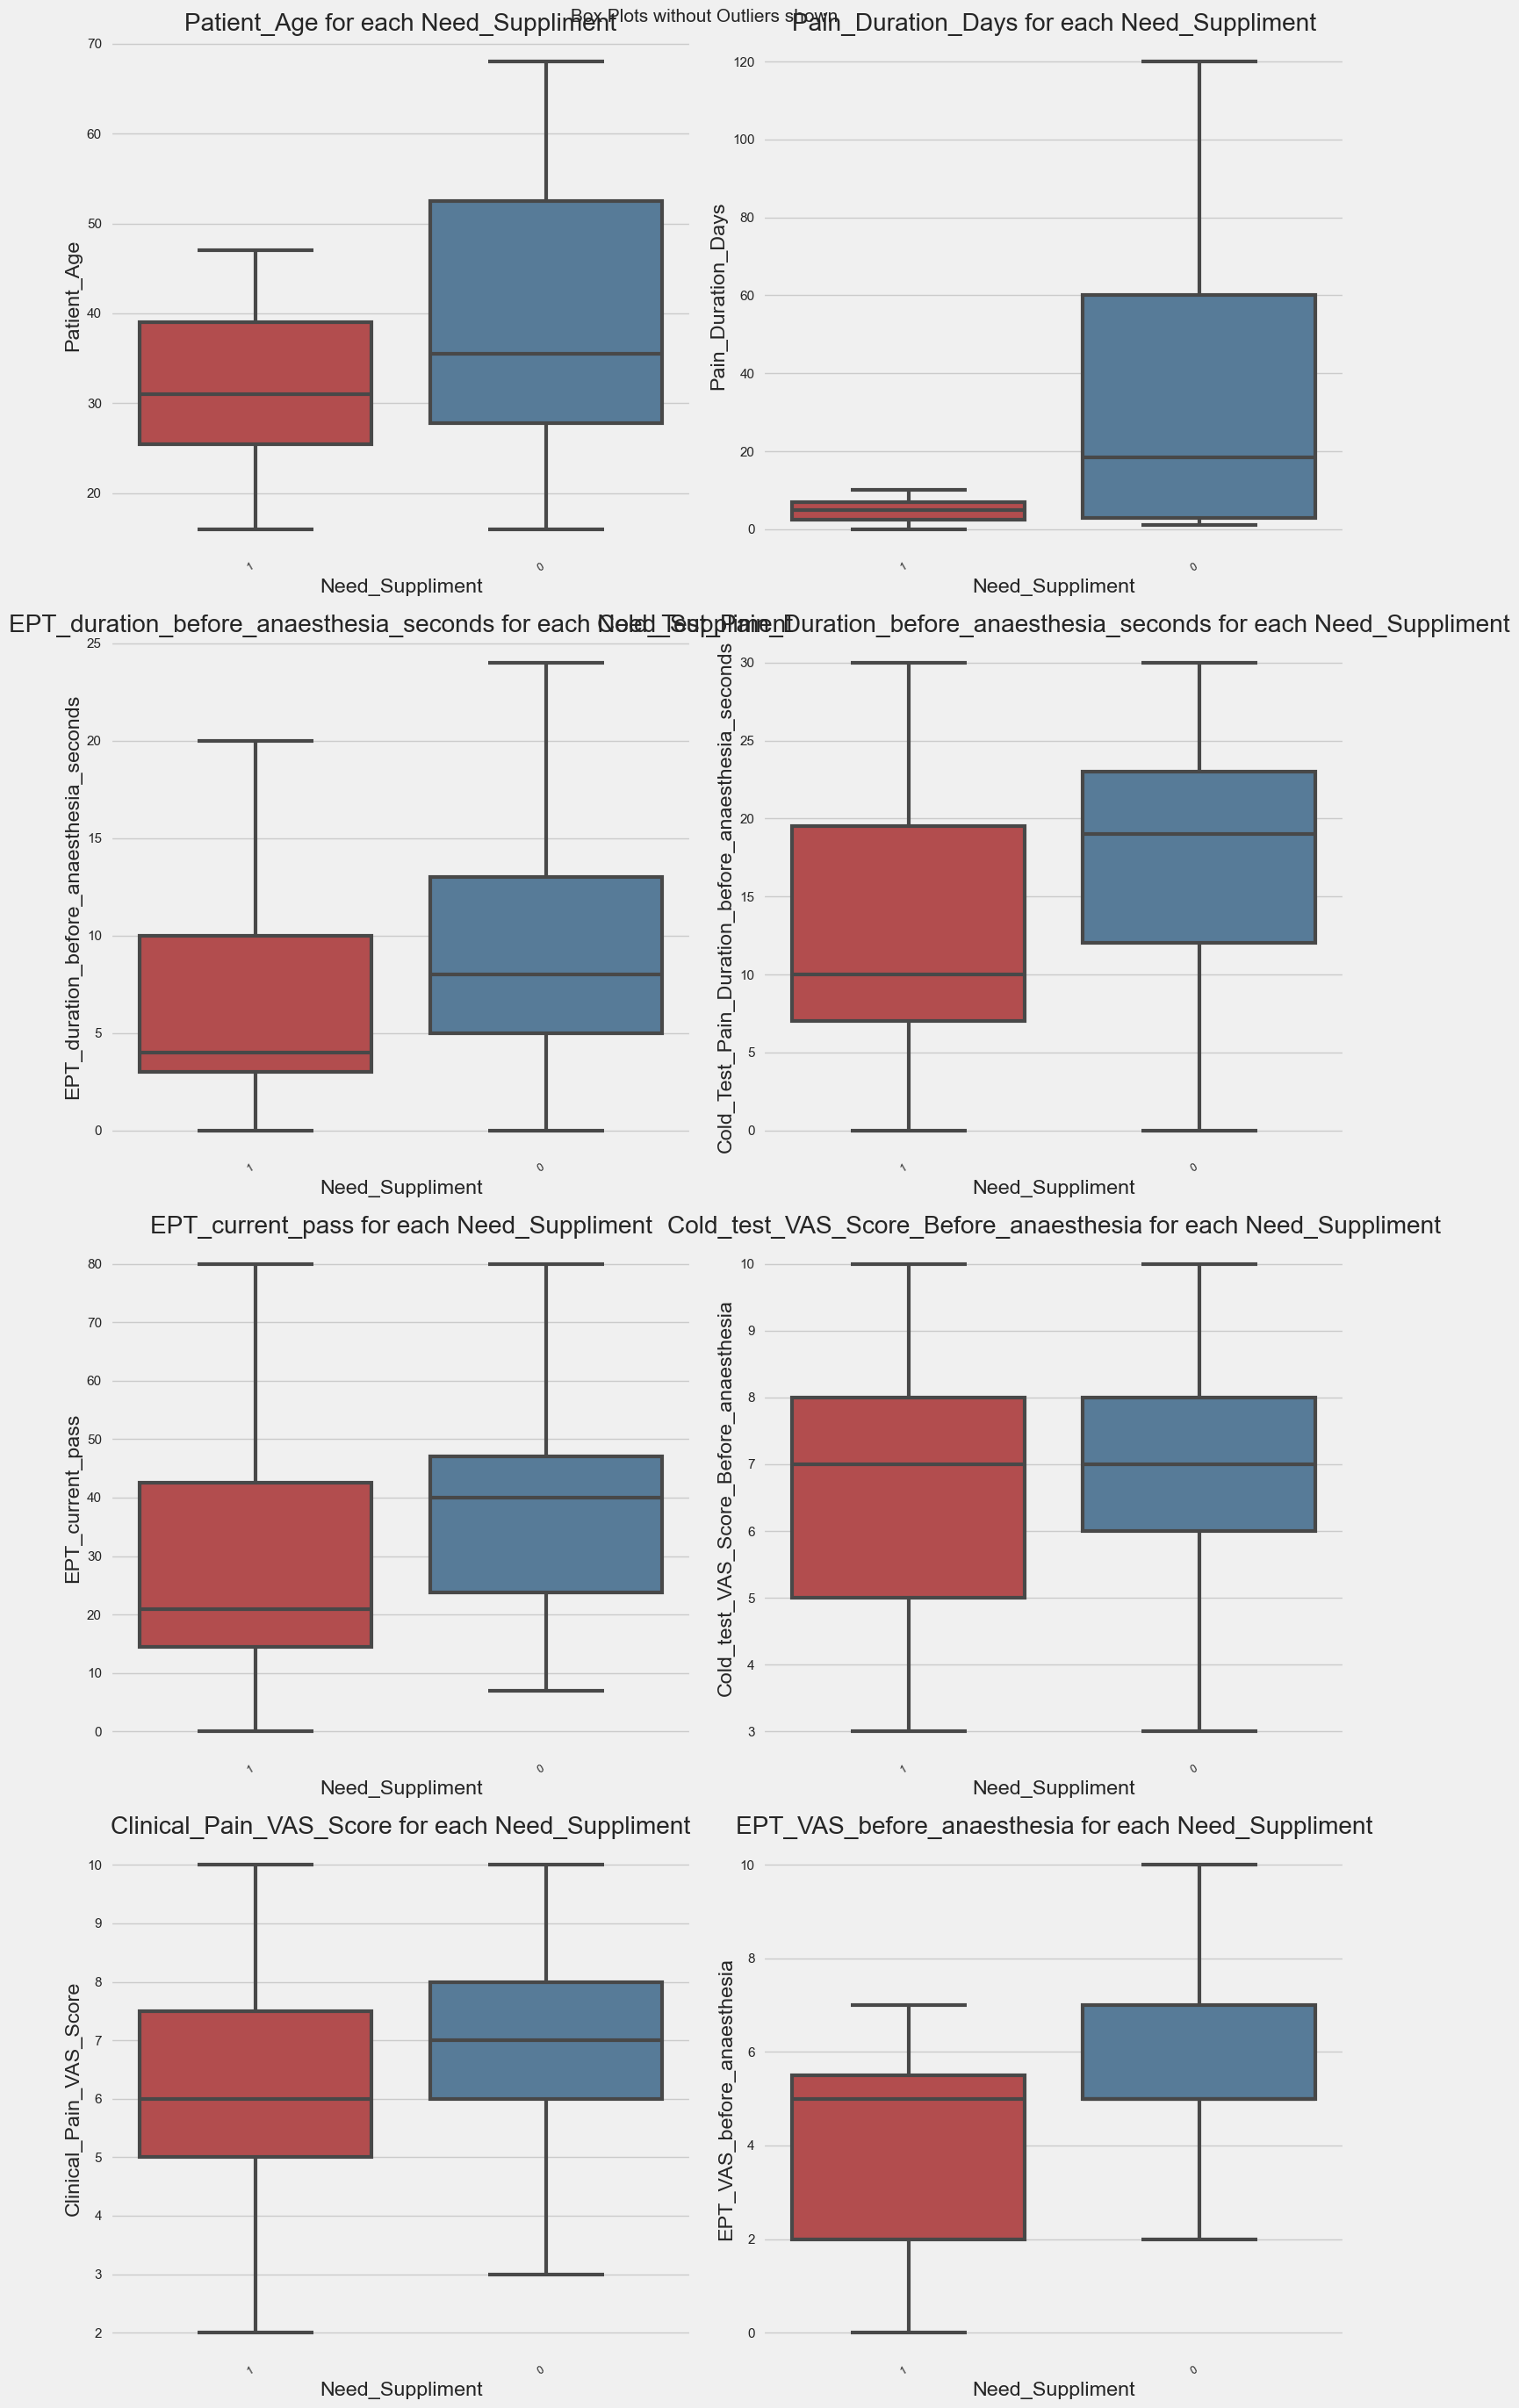

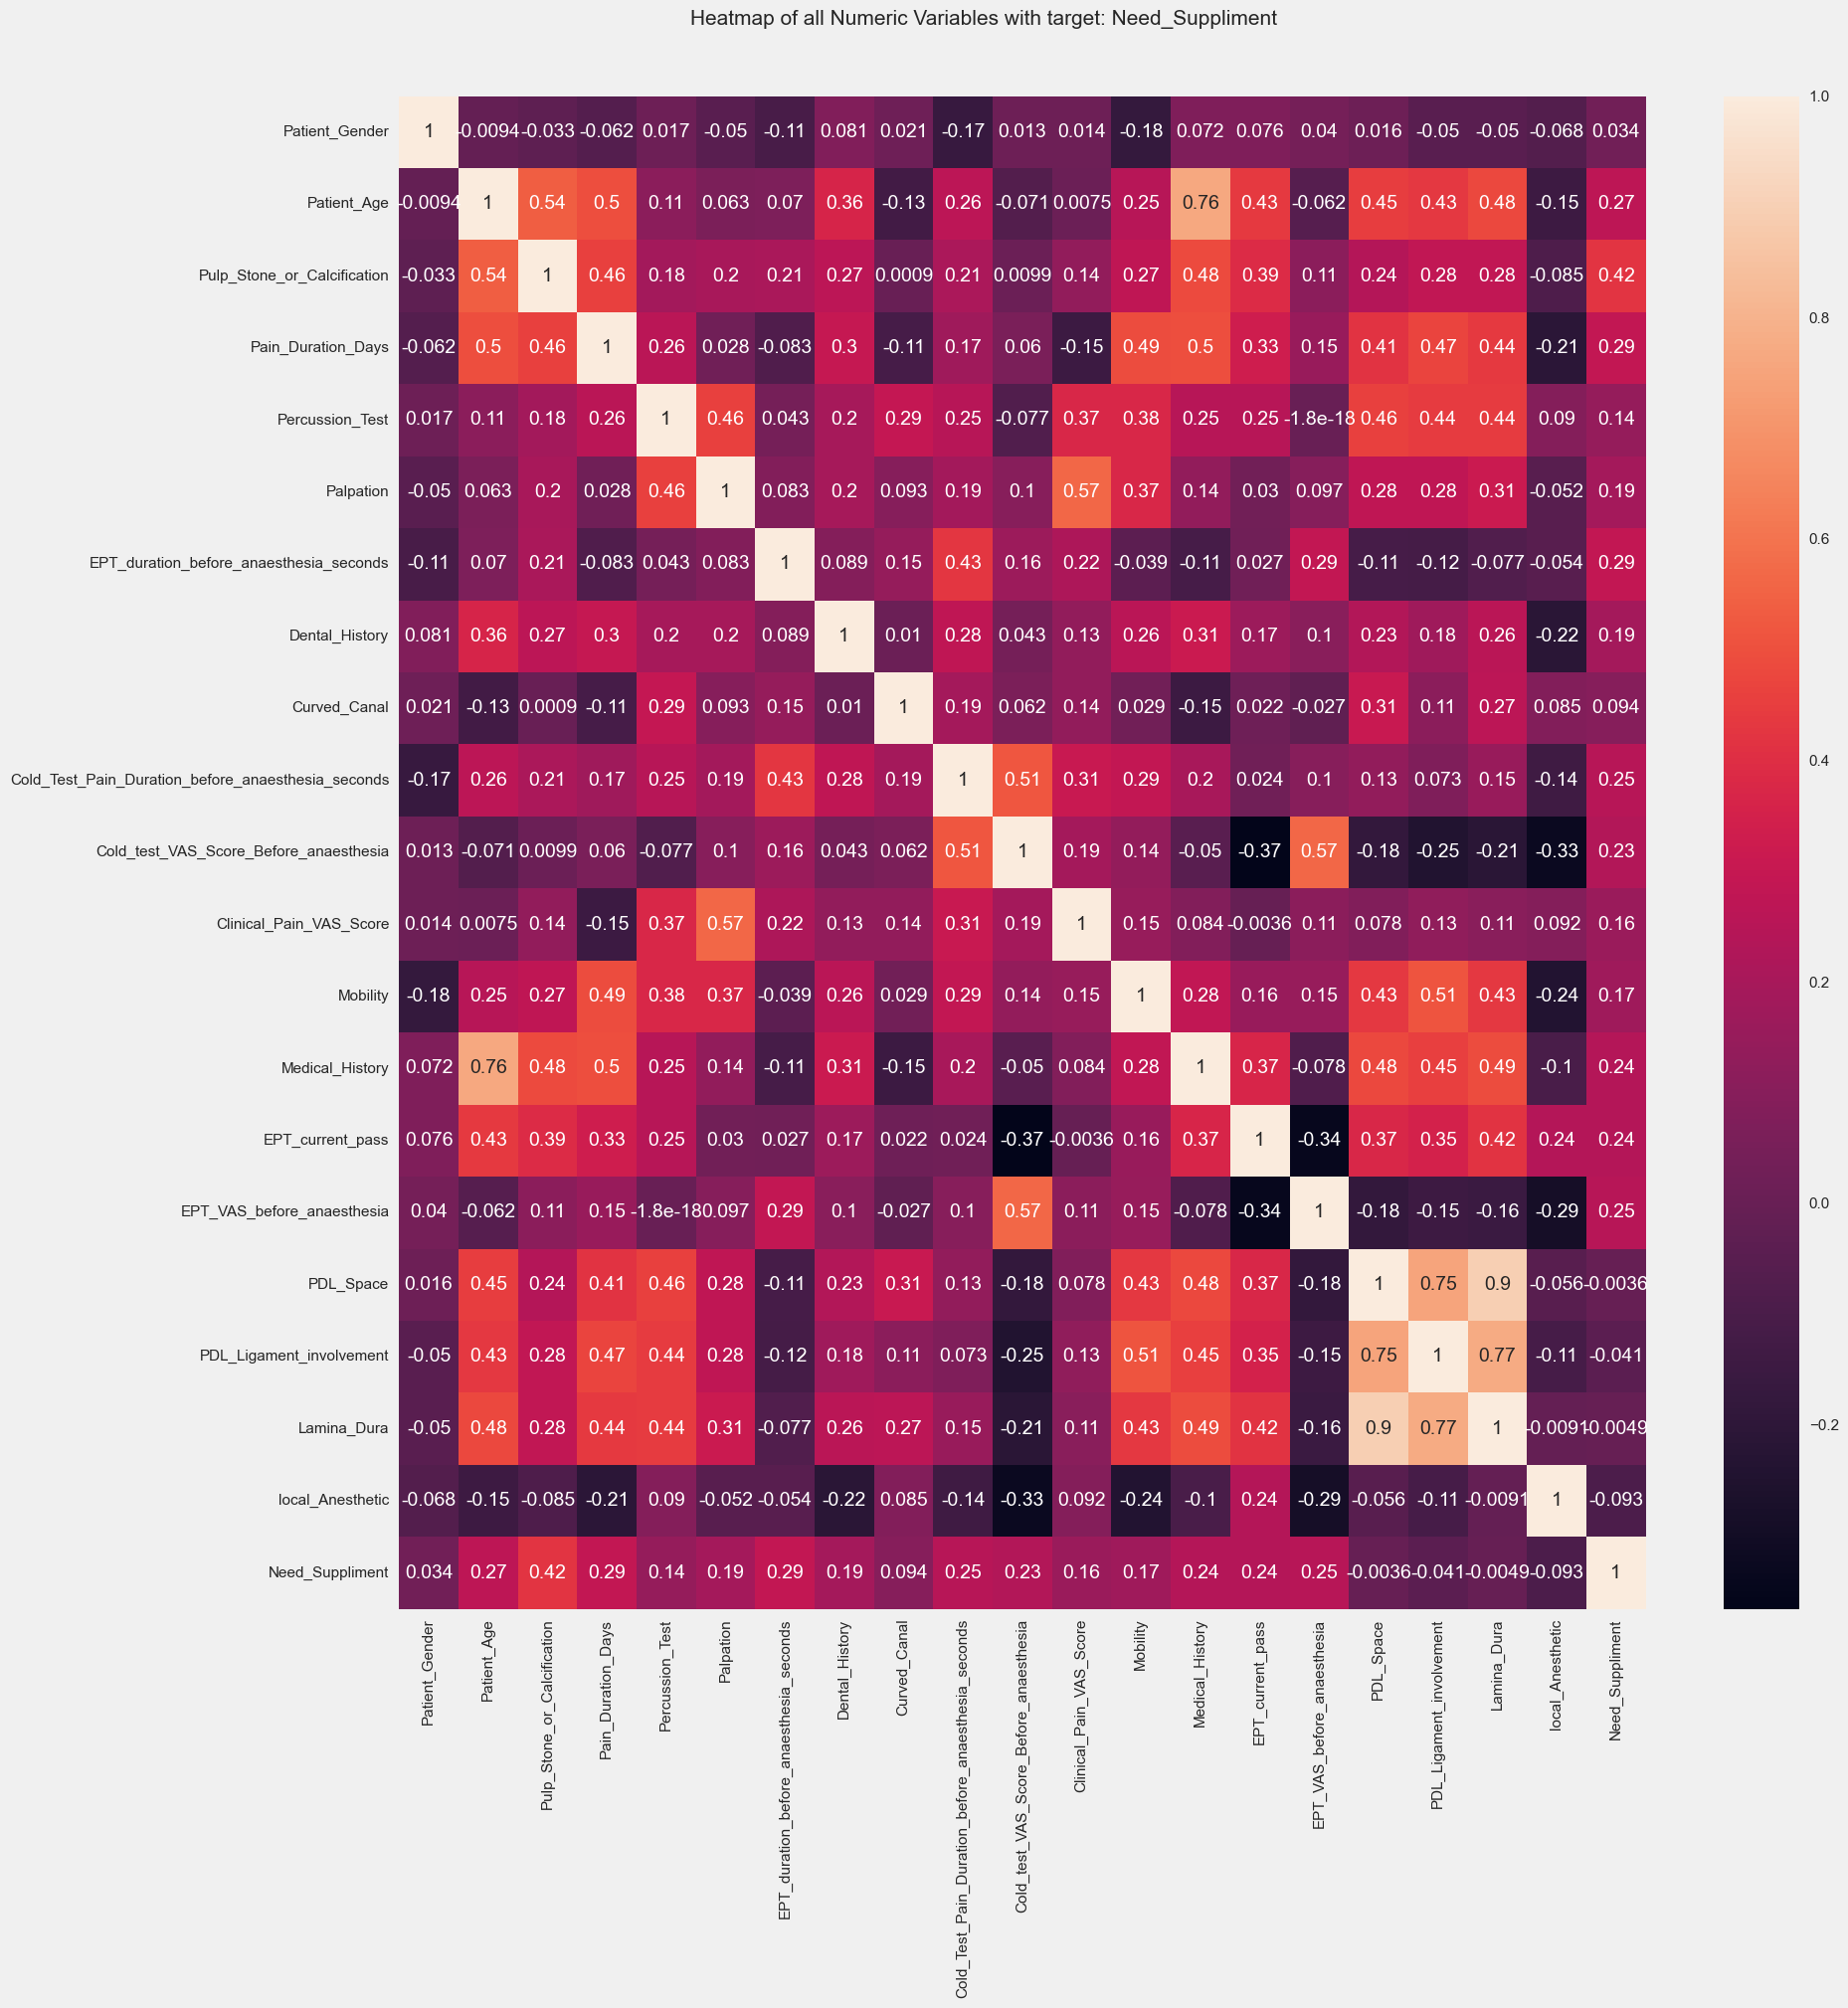

No categorical or numeric vars in data set. Hence no bar charts.
All Plots done
Time to run AutoViz = 16 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [28]:
exp_name = setup(data = df,  target = 'Need_Suppliment')

# launch eda
eda(display_format = 'svg')